In this Capstone project I performed time series forcasting of cryptocurrency prices from 2013 to 2018 for bitcoin. The goal is use time series forcasting models to predict future prices based on current observed prices.

## Importing relevant Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

## Reading the dataset!

In [2]:
df = pd.read_csv('Cryptocurrency Prices by Date.csv')

In [3]:
#df.Currency.value_counts()

In [4]:
#df["Currency"].value_counts()

In [5]:
df.head(2)

,Currency,Date,Price
0,0x,1502892561000,0.111725
1,0x,1502982305000,0.211486


In [6]:
df.Date
#"%b %d %Y %H:%M:%S"
#(D,s,ms,us,ns
#pd.to_datetime(df.Date, unit="ms" , errors='ignore')


0         1502892561000
1         1502982305000
2         1503068692000
3         1503155108000
4         1503241503000
5         1503327903000
6         1503414292000
7         1503500692000
8         1503587106000
9         1503673518000
10        1503759914000
11        1503846326000
12        1503932718000
13        1504019116000
14        1504105496000
15        1504191904000
16        1504280417000
17        1504366808000
18        1504453223000
19        1504539610000
20        1504626014000
21        1504712410000
22        1504801212000
23        1504887636000
24        1504974016000
25        1505060438000
26        1505146827000
27        1505233395000
28        1505319607000
29        1505406010000
              ...      
657286    1515450547000
657287    1515536946000
657288    1515623347000
657289    1515709747000
657290    1515796146000
657291    1515882547000
657292    1515968946000
657293    1516055346000
657294    1516141749000
657295    1516228148000
657296    151631

In [7]:
df_bitcoin = df[df["Currency"]== "bitcoin"]

In [8]:
df_bitcoin.head(2)

,Currency,Date,Price
64167,bitcoin,1367174841000,135.30
64168,bitcoin,1367261101000,141.96


## Data Preprocessing

In [9]:
#converting the date column to proper datetime format
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'], unit='ms')   

In [10]:
# setting the date column as index
df_bitcoin.set_index('Date', inplace=True)  

In [11]:
#dropping the currency as we don not need it
df_bitcoin.drop("Currency",inplace=True,axis=1) 

In [12]:
df_bitcoin.head()

,Price
Date,
2013-04-28 18:47:21,135.30
2013-04-29 18:45:01,141.96
2013-04-30 18:45:02,135.30
2013-05-01 18:45:02,117.00
2013-05-02 19:20:01,103.43


In [13]:
df_bitcoin.info()  #new datframe information!


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1733 entries, 2013-04-28 18:47:21 to 2018-02-10 03:54:27
Data columns (total 1 columns):
Price    1733 non-null float64
dtypes: float64(1)
memory usage: 27.1 KB


In [14]:
df_bitcoin.isnull().sum() #checking for missing data!

Price    0
dtype: int64

In [15]:
#df_bitcoin.index

## Exploratory Data Analysis

Text(0, 0.5, 'Price')

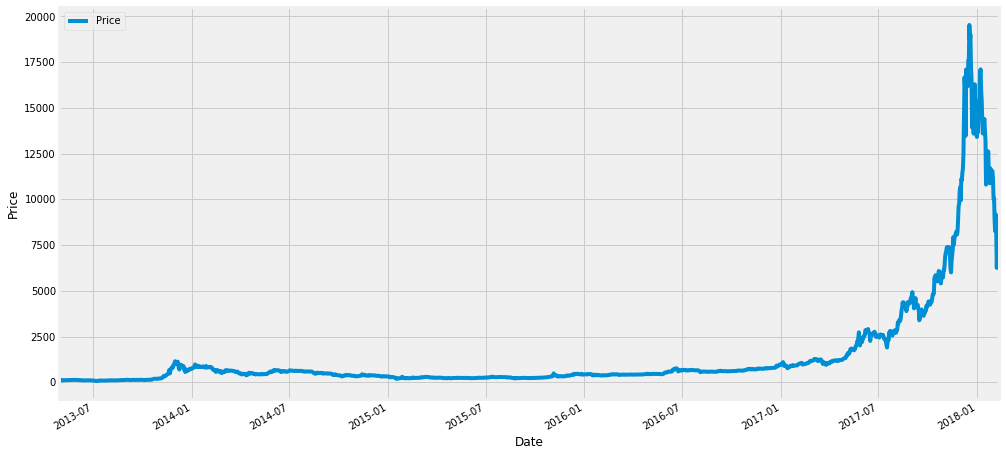

In [16]:
#visualizing the data!
df_bitcoin.plot(figsize=(15, 8))  
plt.ylabel("Price")

Text(0, 0.5, 'Price')

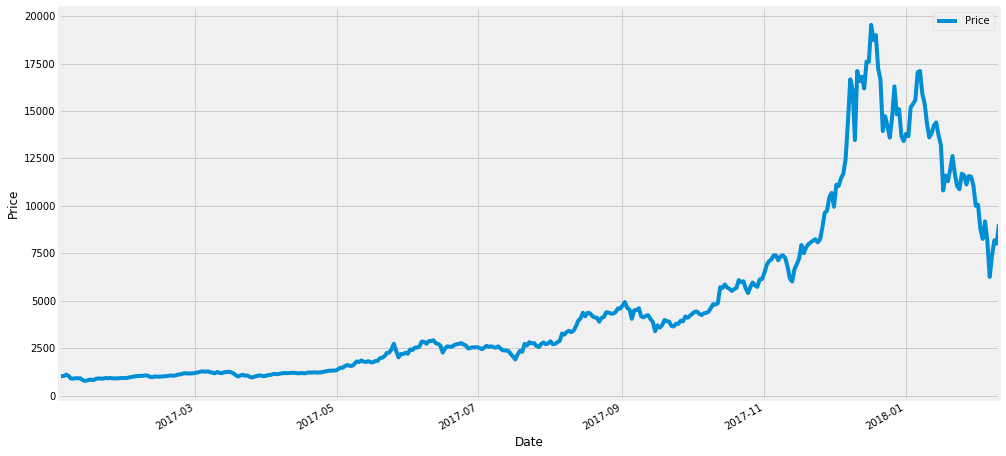

In [17]:
df_bitcoin["2017":].plot(figsize=(15, 8))  
plt.ylabel("Price")

Text(0, 0.5, 'Price')

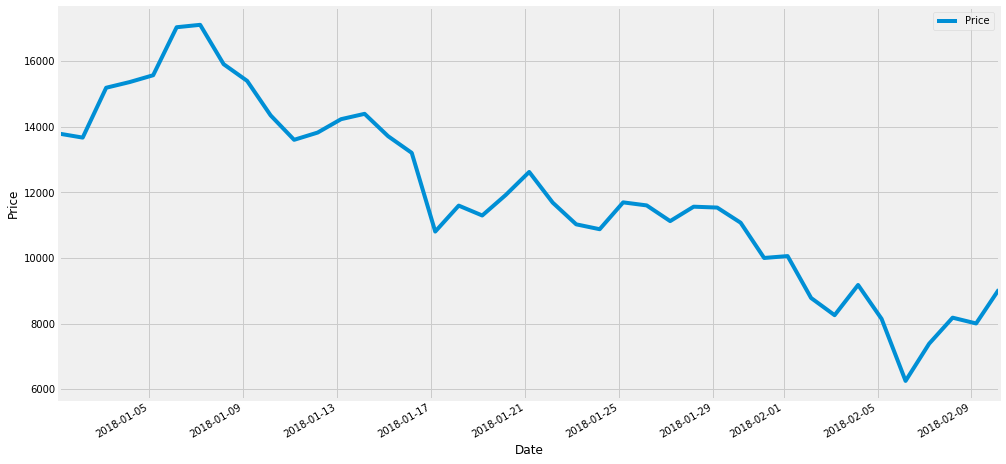

In [18]:
df_bitcoin["2018":].plot(figsize=(15, 8))  
plt.ylabel("Price")

Our current datetime data can be tricky to work with, therefore, we will use the averages daily price value for that month instead, and we are using the start of each month as the timestamp.

In [22]:
#using the average daily price and eliminating the factor of time!
df_bitcoin_m = df_bitcoin['Price'].resample('MS').mean()  

In [23]:
df_bitcoin_m.head()

Date
2013-04-01    137.520000
2013-05-01    119.423968
2013-06-01    107.800359
2013-07-01     89.982171
2013-08-01    113.023968
Freq: MS, Name: Price, dtype: float64

In [24]:
df_bitcoin_m.describe()

count       59.000000
mean      1480.568543
std       2901.848269
min         89.982171
25%        266.109242
50%        482.710667
75%        833.142548
max      15025.925161
Name: Price, dtype: float64

In [50]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #print(rolmean,rolstd)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput) 

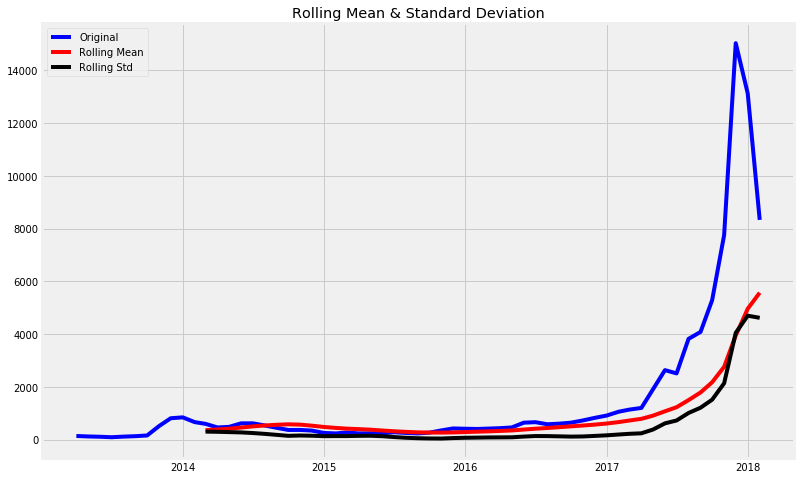

Results of Dickey-Fuller Test:
Test Statistic                  2.099390
p-value                         0.998789
#Lags Used                      6.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [51]:
test_stationarity(df_bitcoin_m)

Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.
We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

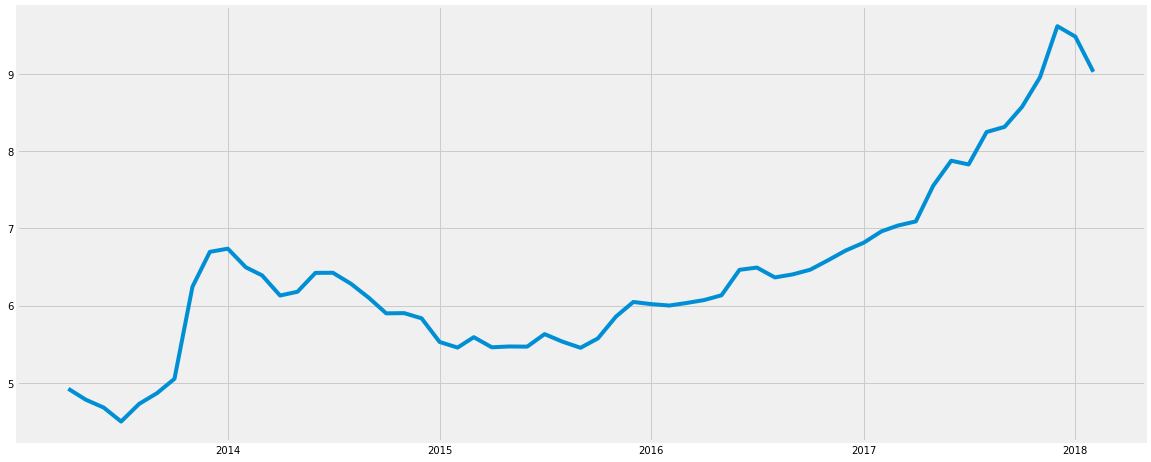

In [46]:
#Estimating trend
df_bitcoin_m_logScale = np.log(df_bitcoin_m)
plt.plot(df_bitcoin_m_logScale)

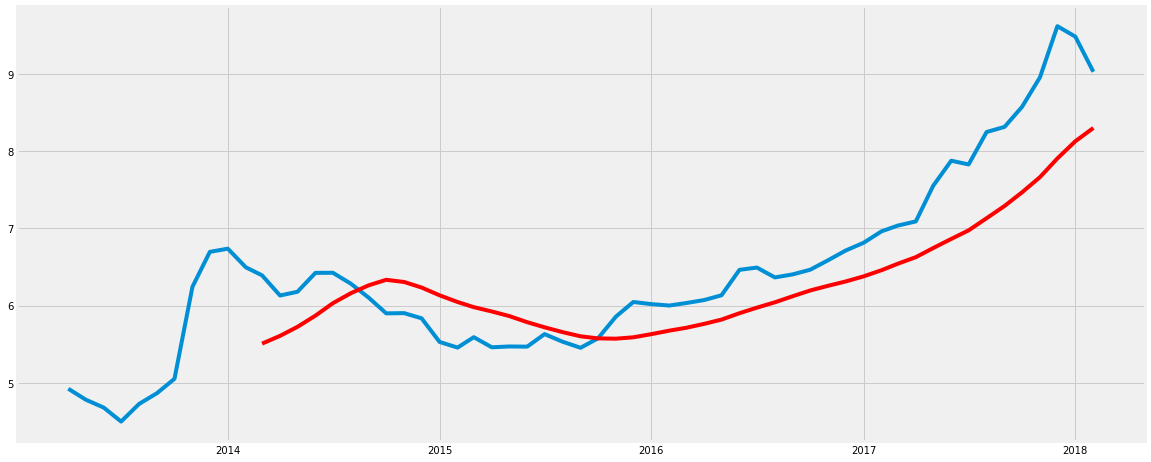

In [48]:
movingAverage = df_bitcoin_m_logScale.rolling(window=12).mean()
movingSTD = df_bitcoin_m_logScale.rolling(window=12).mean()
plt.plot(df_bitcoin_m_logScale)
plt.plot(movingAverage, color='red')

In [54]:
df_bitcoin_m_logScaleMinusMovingAverage = df_bitcoin_m_logScale - movingAverage
df_bitcoin_m_logScaleMinusMovingAverage.head(12)


#Remove Nan Values
df_bitcoin_m_logScaleMinusMovingAverage.dropna(inplace=True)
df_bitcoin_m_logScaleMinusMovingAverage.head(10)

Date
2014-03-01    0.883475
2014-04-01    0.522005
2014-05-01    0.454085
2014-06-01    0.553397
2014-07-01    0.394426
2014-08-01    0.123395
2014-09-01   -0.161995
2014-10-01   -0.434142
2014-11-01   -0.402957
2014-12-01   -0.398546
Freq: MS, Name: Price, dtype: float64

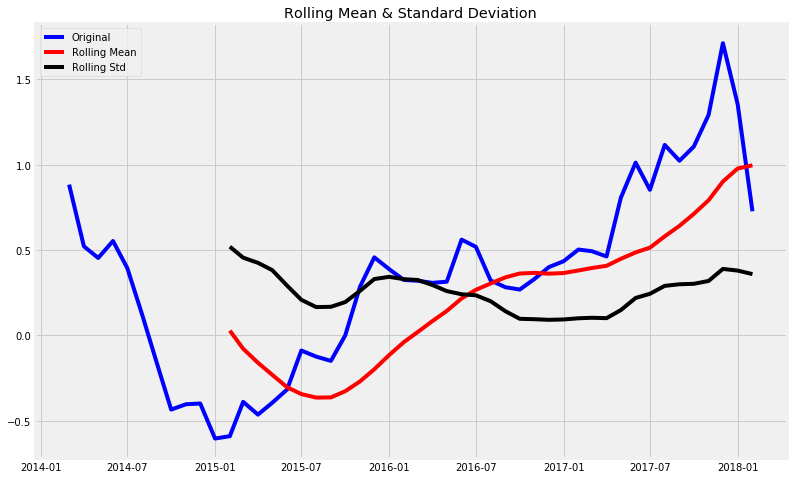

Results of Dickey-Fuller Test:
Test Statistic                 -1.097695
p-value                         0.715990
#Lags Used                      2.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [55]:
test_stationarity(df_bitcoin_m_logScaleMinusMovingAverage)

Text(0, 0.5, 'Price')

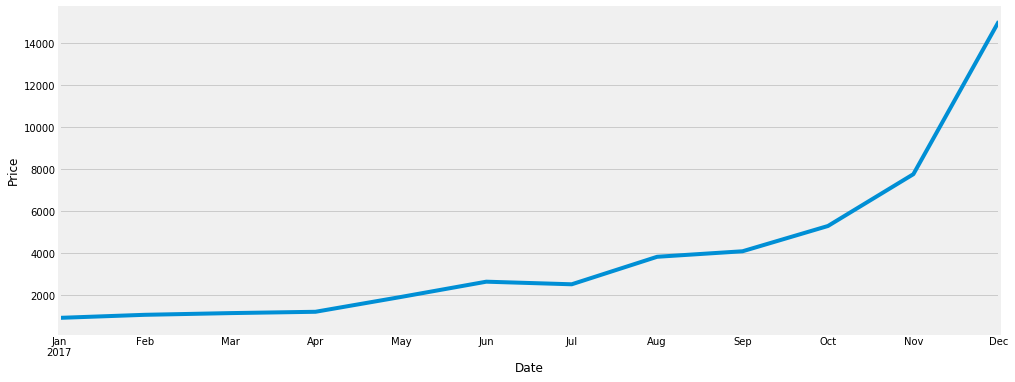

In [27]:
#What are varying prices of bitcoin in the year 2017 alone?
df_bitcoin_m['2017'].plot(figsize=(15, 6)) 
plt.ylabel("Price")

Text(0, 0.5, 'Price')

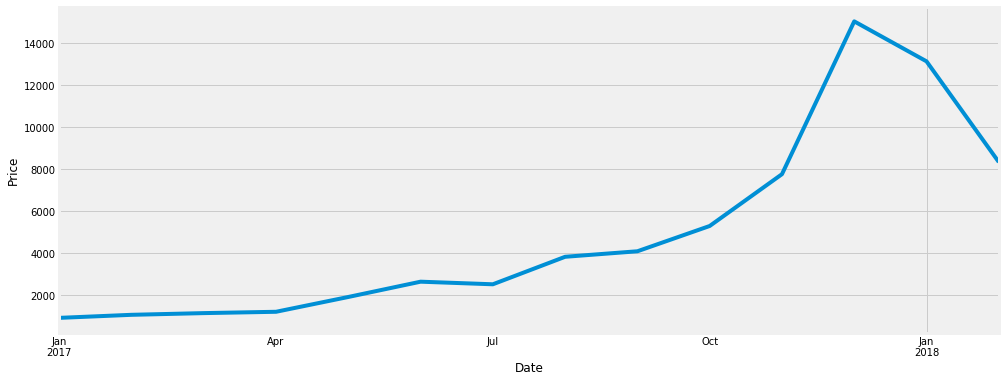

In [28]:
#what are the prices in the year 2017 till the end!
df_bitcoin_m['2017':].plot(figsize=(15, 6)) 
plt.ylabel("Price")

Text(0, 0.5, 'Price')

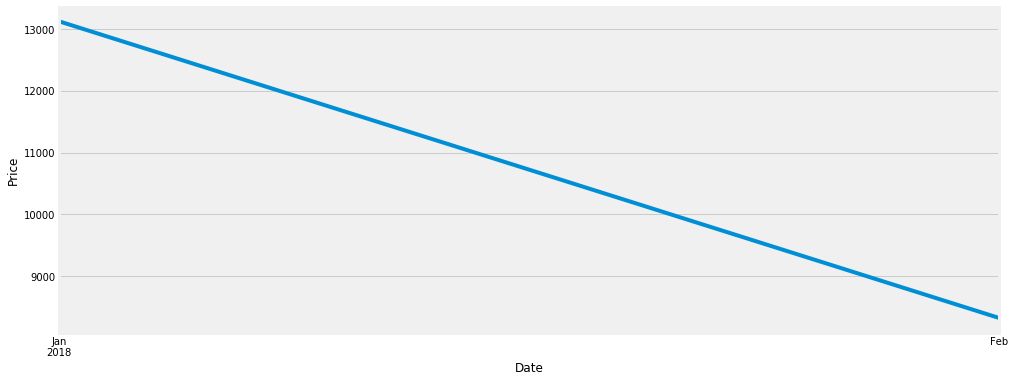

In [29]:
#What did the price of bitcoin start do decline after reaching its peak in 2017?
df_bitcoin_m['2018':].plot(figsize=(15, 6)) 
plt.ylabel("Price")

We can also visualize our data using a method called <strong>time-series decomposition</strong> that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [30]:
# import matplotlib
# matplotlib.rcParams['axes.labelsize'] = 14
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['text.color'] = 'k'

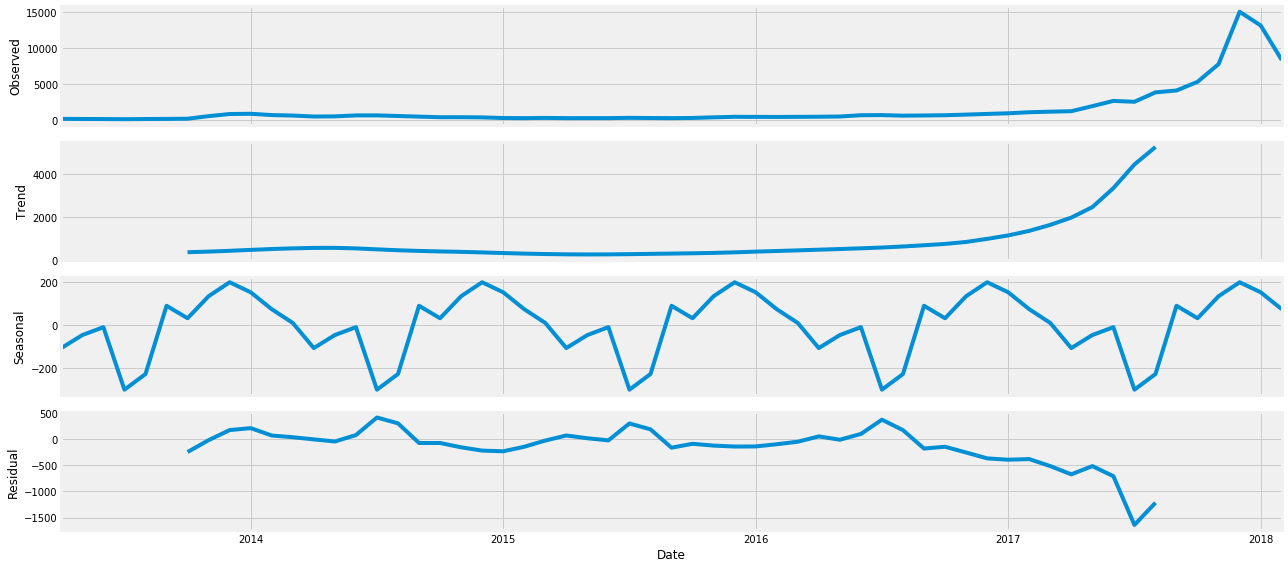

In [31]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_bitcoin_m, model='additive')
fig = decomposition.plot()

The plots above clearly shows that the price of bitcoin is stable until the year 2017 where the price of bitcoin is clearly <strong>unstable</strong>. Showing an obvious <strong>exponential</strong> upward trend in the year 2017 and reaching a peak followed by a sharp downward trend in the year 2018

## Time series forcasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as <strong>ARIMA</strong>, which stands for <strong>Autoregressive Integrated Moving Average</strong>.
ARIMA models are denoted with the notation <code>ARIMA(p, d, q)</code>. These three parameters account for seasonality, trend, and noise in data:

The parameters of the ARIMA model are defined as follows:
<ul>
    <li>p: The number of lag observations included in the model, also called the lag order.</li>
<li>d: The number of times that the raw observations are differenced, also called the degree of differencing.</li>
    <li>q: The size of the moving average window, also called the order of moving average.</li>
 </ul>   

This next step involves hyperparameter tuning for our bitcoin price ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [32]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [56]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_bitcoin_m,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1105.1089461997421
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:885.9254025294249
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:878.9031932942027
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1337.0613085416298
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:878.4284224165986
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:852.5852572597983
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:670.0615173897716
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1503.656480931205
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1039.9802663673092
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:824.5690259982027
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:824.2491422898461
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2905.9377975686793
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:836.747980183234
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:805.2781021496893
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:638.5786988040578
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:977.4874104124842
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:784.6208853859202
ARIMA(0, 1, 0)x(0, 1,

The above output suggests that <code>SARIMAX(1, 1, 1)x(1, 1, 0, 12)</code> yields the lowest AIC value of 586.66. Therefore we should consider this to be optimal option.

## Fitting the ARIMA model

In [34]:
mod = sm.tsa.statespace.SARIMAX(df_bitcoin_m,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5540      0.091     -6.067      0.000      -0.733      -0.375
ma.L1          1.1880      0.055     21.622      0.000       1.080       1.296
ar.S.L12      -0.7642      4.701     -0.163      0.871      -9.978       8.450
sigma2      1.808e+06   1.05e-05   1.73e+11      0.000    1.81e+06    1.81e+06


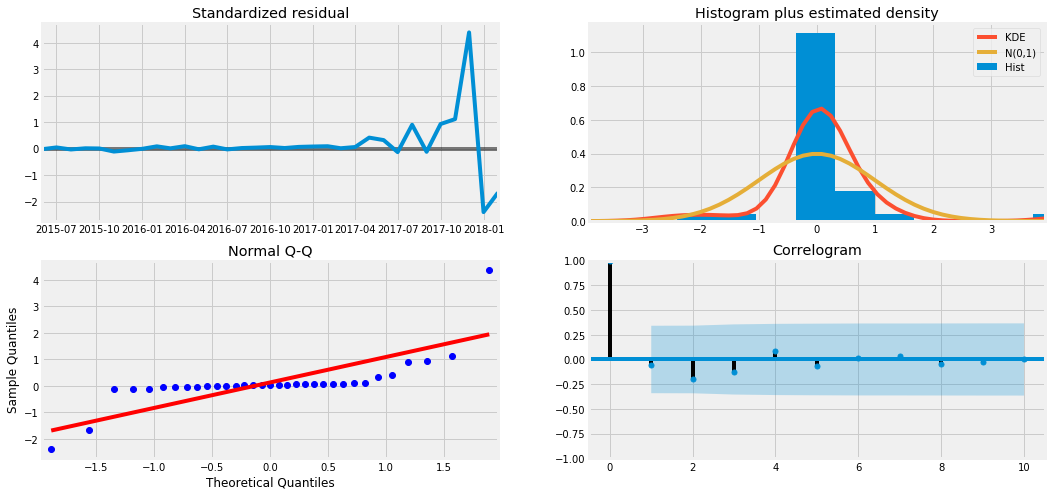

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

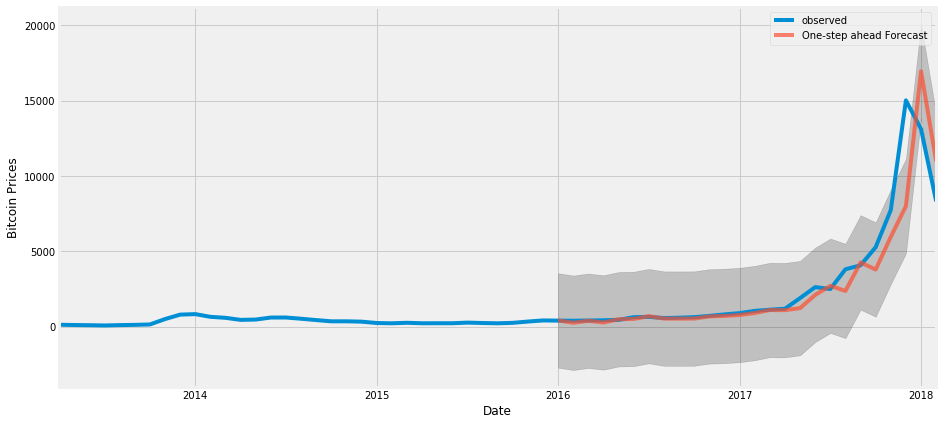

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2016'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_bitcoin_m['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Prices')
plt.legend()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year  2017 and captured the seasonality toward the end of the year 2017.

In [37]:
y_forecasted = pred.predicted_mean
y_truth = df_bitcoin_m['2013-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3051710.71


In [38]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1746.91


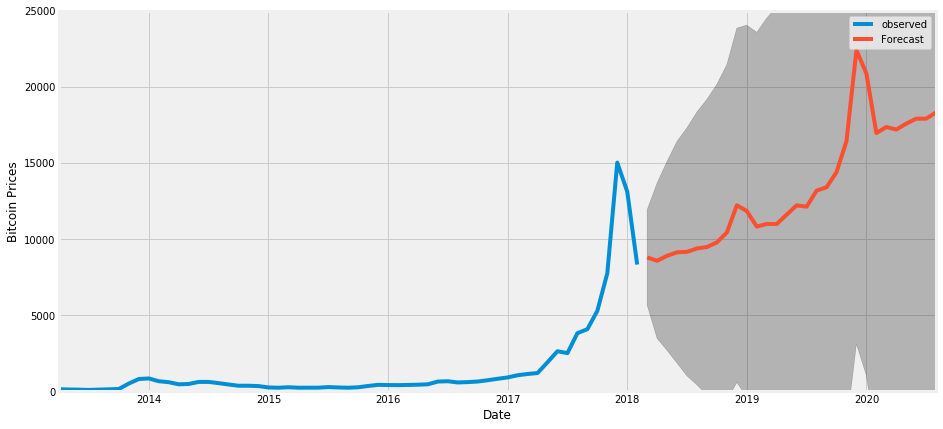

In [39]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = df_bitcoin_m.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Prices')
# ax.set_xlim([xmin,xmax])
ax.set_ylim([0,25000])
plt.legend()

I have succesfully used the SARIMA forcasting model to predict the bitcoin prices for the year 2018 to the year 2020. From my prediction the best time to buy bitcoins would be the first quarter of 2018 or the first quarter of 2019.
For maximum profit the best time to sell bitcoin would be the beggining of the 4th quarter in the year 2019 when the bitcoin prices reaches its peak before a predicted decline in prices. 
Our model clearly captures the seasonality of Bitcoin prices.